In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data=pd.read_csv("C:\\Users\\user\\AppData\\Local\\Temp\\Rar$DIa15316.5656\\weight-height.csv")
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [40]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [41]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [42]:
x=data.values[:,1]
x

array([73.847017017515, 68.7819040458903, 74.1101053917849, ...,
       63.8679922137577, 69.0342431307346, 61.9442458795172], dtype=object)

In [43]:
y=data.values[:,2]
y

array([241.893563180437, 162.3104725213, 212.7408555565, ...,
       128.475318784122, 163.852461346571, 113.649102675312], dtype=object)

In [44]:
meanx=np.mean(x)
meanx

66.36755975482106

In [45]:
meany=np.mean(y)
meany

161.44035683283076

In [63]:
#Ols ordinary least squares
n=len(x)
#to calucalte b0 and b1
numer=0
denom=0
for i in range(n):
    numer+=(x[i]-meanx)*(y[i]-meany)
    denom+=(x[i]-meanx)**2
b1=numer/denom
b0=meany-(b1*meanx)
print(b1)
print(b0)
    

7.717287640785374
-350.7371918121346


In [64]:
print("the linear model is y={:.3}x+{:.5}".format(b1,b0))

the linear model is y=7.72x+-350.74


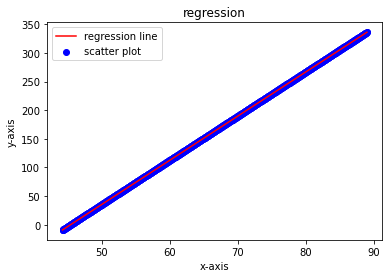

In [97]:
maxx=np.max(x)+10
minx=np.min(x)-10
x=np.linspace(maxx,minx,1000)
y=b1*x+b0
plt.plot(x,y,color='red',label='regression line')
plt.scatter(x,y,color='blue',label='scatter plot')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('regression')
plt.legend()
plt.show()



In [102]:
ypred=b0+b1*x[1]
ypred

335.746119397351

In [103]:
x[2]

88.9091815675682

In [105]:
ss_tot=0
ss_res=0
for i in range(n):
    y_pred=b0+b1*x[i]
    ss_tot=ss_tot+(y[i]-meany)**2
    ss_res=ss_res+(y[i]-ypred)**2
r2=1-((ss_res/ss_tot))
print('R2 score')
print(r2)


R2 score
-2.9803776798014727


In [77]:
# sklearn

In [78]:
from sklearn.linear_model import LinearRegression

In [84]:
X=data.values[:,1].reshape(-1,1)
Y=data.values[:,2].reshape(-1,1)

In [86]:
reg=LinearRegression()

In [106]:
reg.fit(X,Y)

LinearRegression()

In [94]:
prediction=reg.predict(X)
prediction



array([[219.16147993],
       [180.07254619],
       [221.19180859],
       ...,
       [142.15047514],
       [182.01991949],
       [127.30437133]])

In [95]:
r2score=reg.score(X,Y)
print("R2 score",r2score)

R2 score 0.8551742120609958


In [96]:
reg.predict([[74]])

array([[220.34209361]])